In [128]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.layers import Dense, Flatten, Normalization
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow_addons as tfa
from keras.optimizers import SGD


In [129]:

arial = pd.read_csv('datasets/ARIAL.csv')
agency = pd.read_csv('datasets/AGENCY.csv')
baiti = pd.read_csv('datasets/BAITI.csv')
# arial = pd.read_csv('ARIAL.csv')


Data filtration (choosing letters only)

In [130]:
def isletter(letter):
    return chr(letter).isalpha()

letters_arial = arial[arial['m_label'].apply(isletter)]
letters_agency = agency[agency['m_label'].apply(isletter)]
letters_baiti = baiti[baiti['m_label'].apply(isletter)]

In [131]:
X1 = letters_arial.loc[:, "r0c0":].to_numpy()
indices = np.arange(X1.shape[0])
indices = np.random.choice(indices, size=600)
X1 = X1[indices]

X = np.concatenate((X1))

X2 = letters_agency.loc[:, "r0c0":].to_numpy()

X3 = letters_baiti.loc[:, "r0c0":].to_numpy()
indices_x3 = np.arange(X3.shape[0])
indices_x3 = np.random.choice(indices_x3, size=600)
X3 = X3[indices_x3]

X = np.concatenate((X1, X2, X3))

# len(X1), len(X2), len(X3) 

In [132]:
fonts = ['arial', 'agency', 'baiti']

y = np.concatenate((
    np.full(X1.shape[0], 0),
    np.full(X2.shape[0], 1),
    np.full(X3.shape[0], 2)
))

# y = np.full(X1.shape[0], 0)

Shuffling the dataset

In [133]:
indices = np.arange(y.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

## Doing stuff

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [135]:
mlp = Sequential([
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')
])

mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [136]:
history = mlp.fit(X_train, y_train,  validation_split=0.15, epochs=100)
result = mlp.evaluate(X_test, y_test, verbose=0)


Epoch 1/100
38/38 [==============================] - 1s 17ms/step - loss: 30.8283 - accuracy: 0.4579 - val_loss: 7.0324 - val_accuracy: 0.5190
Epoch 2/100
38/38 [==============================] - 0s 7ms/step - loss: 4.1687 - accuracy: 0.6423 - val_loss: 4.0450 - val_accuracy: 0.6857
Epoch 3/100
38/38 [==============================] - 0s 8ms/step - loss: 2.5854 - accuracy: 0.7416 - val_loss: 3.6491 - val_accuracy: 0.6333
Epoch 4/100
38/38 [==============================] - 0s 7ms/step - loss: 1.4908 - accuracy: 0.7963 - val_loss: 3.3906 - val_accuracy: 0.6810
Epoch 5/100
38/38 [==============================] - 0s 8ms/step - loss: 0.8904 - accuracy: 0.8535 - val_loss: 2.5045 - val_accuracy: 0.7048
Epoch 6/100
38/38 [==============================] - 0s 8ms/step - loss: 0.9380 - accuracy: 0.8544 - val_loss: 2.2231 - val_accuracy: 0.7524
Epoch 7/100
38/38 [==============================] - 0s 8ms/step - loss: 0.7840 - accuracy: 0.8636 - val_loss: 2.2074 - val_accuracy: 0.7381
Epoch 8/100

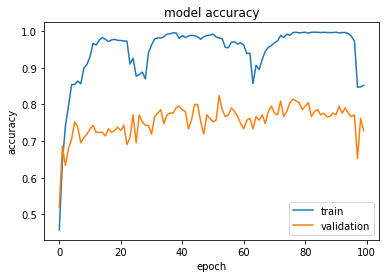

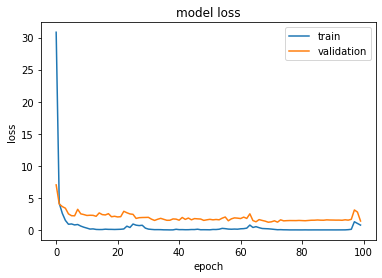

test loss, test acc:  [1.1432640552520752, 0.7657142877578735]


In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()
# tsummarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

print('test loss, test acc: ', result)